<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/b_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part B
## Hierarchical Clustering

Hints:   
1. [clustering.ipynb](https://colab.sandbox.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb)

Dataset Source:

[Online Retail K-means & Hierarchical Clustering](https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering)


Sources Used:
1. ChatGPT-4
2. All listed hints

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Loading Dataset

In [5]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_b/onlineretail.csv'

In [6]:
# Load the dataset
file_path = dataset_file_path  # Update the file path
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except Exception as e:
    print("Error loading file:", e)

### Analyzing the Dataset

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Dataset Analysis Results
The dataset contains the following columns:
1. **InvoiceNo**: Invoice number, a unique identifier for each transaction.
2. **StockCode**: Product item code.
3. **Description**: Product description.
4. **Quantity**: The quantities of each product per transaction.
5. **InvoiceDate**: The date and time of the transaction.
6. **UnitPrice**: Unit price of the product.
7. **CustomerID**: Customer number, a unique identifier for each customer.
8. **Country**: Country name where the customer resides.

Given this information, we have two primary options for hierarchical clustering:

1. **Customer Segmentation**: Group customers based on their purchasing patterns. This would involve aggregating the data by *CustomerID* and using features like total spend, average unit price, number of purchases, etc.

2. **Product Categorization**: Group products based on purchasing patterns across different transactions. This would involve using **StockCode** or **Description** and features like total sales, average price, etc.

We shall go with the Customer Segmentation Option.

### Data Preprocessing and Handling Missing Data

In [9]:
# Calculate total spend per customer
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
customer_data = data.groupby('CustomerID').agg(TotalSpend=('TotalSpend', 'sum'),
                                               AverageUnitPrice=('UnitPrice', 'mean'),
                                               PurchaseFreq=('InvoiceNo', 'nunique')).reset_index()


In [10]:
# Drop rows with missing CustomerID
customer_data = customer_data.dropna(subset=['CustomerID'])


### Standardization
We need to scale the features since hierarchical clustering is sensitive to the scales of the data.

This step involves scaling the features so that they have a mean of 0 and a standard deviation of 1. This is crucial for clustering algorithms as they are sensitive to the scale of the data.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['TotalSpend', 'AverageUnitPrice', 'PurchaseFreq']])


### Hierarchical Clustering
After standardizing the data, we'll use the 'ward' method for hierarchical clustering. This method is effective as it minimizes the variance of the clusters being merged.

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, method='ward')


### Plotting Dendogram
The dendrogram will help us visualize the clustering process and understand the relationships between customers.

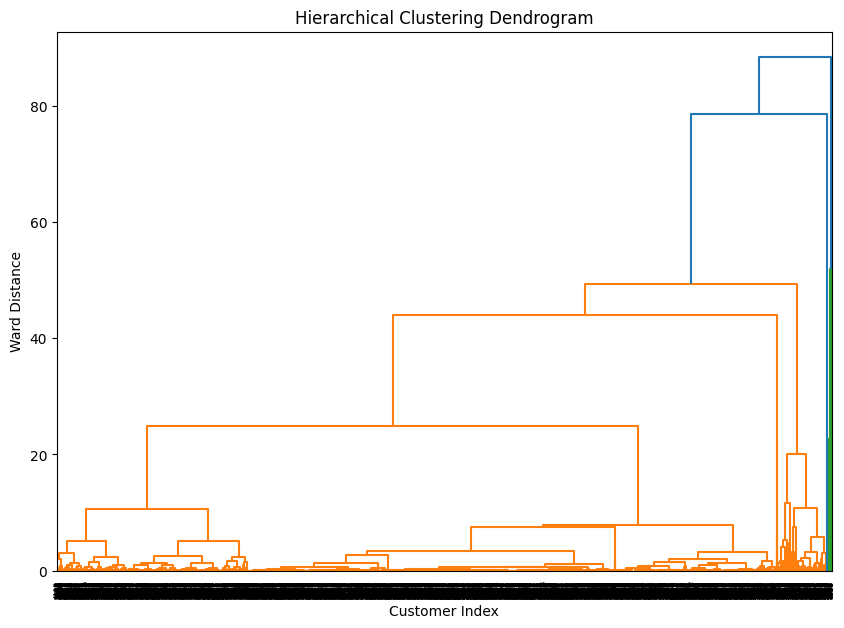

In [13]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Ward Distance')
plt.show()


### Conclusion
This colan notebook demonstrates the power of hierarchical clustering in uncovering customer segments in retail data.

The insights gained are not only valuable for understanding customer behavior but also lay a foundation for more informed business decision-making and strategy development.

As we continue to evolve in the data-driven era, the ability to effectively segment customers will remain a key competitive advantage for retail businesses.